<a href="https://colab.research.google.com/github/suhrobm/Machine-Learning-In-Industry/blob/main/Task_3_Suhrob_Munavarov_Group_J4234c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **LAB 3.  Industrial processes scheduling using the SAMPO framework**
---

### **Content** 🎯

SAMPO is a Scheduler for Adaptive Manufacturing Processes Optimization.

SAMPO is an open-source framework for adaptive manufacturing processes scheduling. This framework is distributed under the 3-Clause BSD license. It provides toolbox for generating schedules of manufacturing process under the constraints imposed by the subject area. The core of SAMPO is based on the combination of meta-heuristic, genetic and multi-agent algorithms. Taking as input the task graph with tasks connections and resource constraints, as well as the optimization metric, the scheduler builds the optimal tasks sequence and resources assignment according to the given metric.



### **Context**

In this task, we are going to generate a schedule optimization procedure for synthetically generated graph structure so that we could be able to solve industrial processes, which simulates the real industrial projects' data, and for the actual project in the area of gas and oil field development.

We need to configure classic scheduling pipelines and try to tune the parameters of the genetic scheduler to solve the makespan variation of the schedule's optimization most efficiently.

In [1]:
''' installing sampo package
'''
!pip install sampo==0.1.1.221

### **1. Schedule time optimization on synthetic graphs**

In this part of the task, we will:
* create the synthetically generated graph structure, which simulates the real industrial tasks' structure;
* configure contractors for executing these tasks;
* set up the different types of schedulers to create schedules, which will be optimal in terms of time to complete all project tasks;
* configure scheduling pipelines;
* visualize final schedules.

### **1.1 Synthetic WorkGraph object creation**

Create the synthetic WorkGraph object in `GENERAL` mode.

Resulted graph should contain 3 clusters, with the bottom border of total project works' number = 200 and the top border = 500.

Use `seed=21` for the graph generation.


In [2]:
''' graph generation, SimpleSynthetic object used for the simple work graph structure generation
    SimpleSynthetic class that should be used for synthetic/unreal graph generation
    it has enough methods to generate whatever you want to give to scheduler
'''
from sampo.generator.base import SimpleSynthetic
from sampo.generator.types import SyntheticGraphType

wg_seed = 21

# we are creating the artificial/spurious work graph object
ss = SimpleSynthetic(wg_seed)

''' simple graph
    should generate general (average) type of graph with 3 clusters from 200 to 500 vertices each
'''
general_wg = ss.work_graph( mode=SyntheticGraphType.GENERAL,
                            cluster_counts = 3,   # - number of clusters for the graph
                            bottom_border = 200,  # - bottom border for number of works for the graph
                            top_border = 500,     # - top border for number of works for the graph
)

Visualize the structure of the created WorkGraph and answer the following questions:
1. What is the total number of works in the created graph?
2. What is the total number of connections between the works in the created graph?
3. What is the maximum number of successors the works in the constructed graph have?

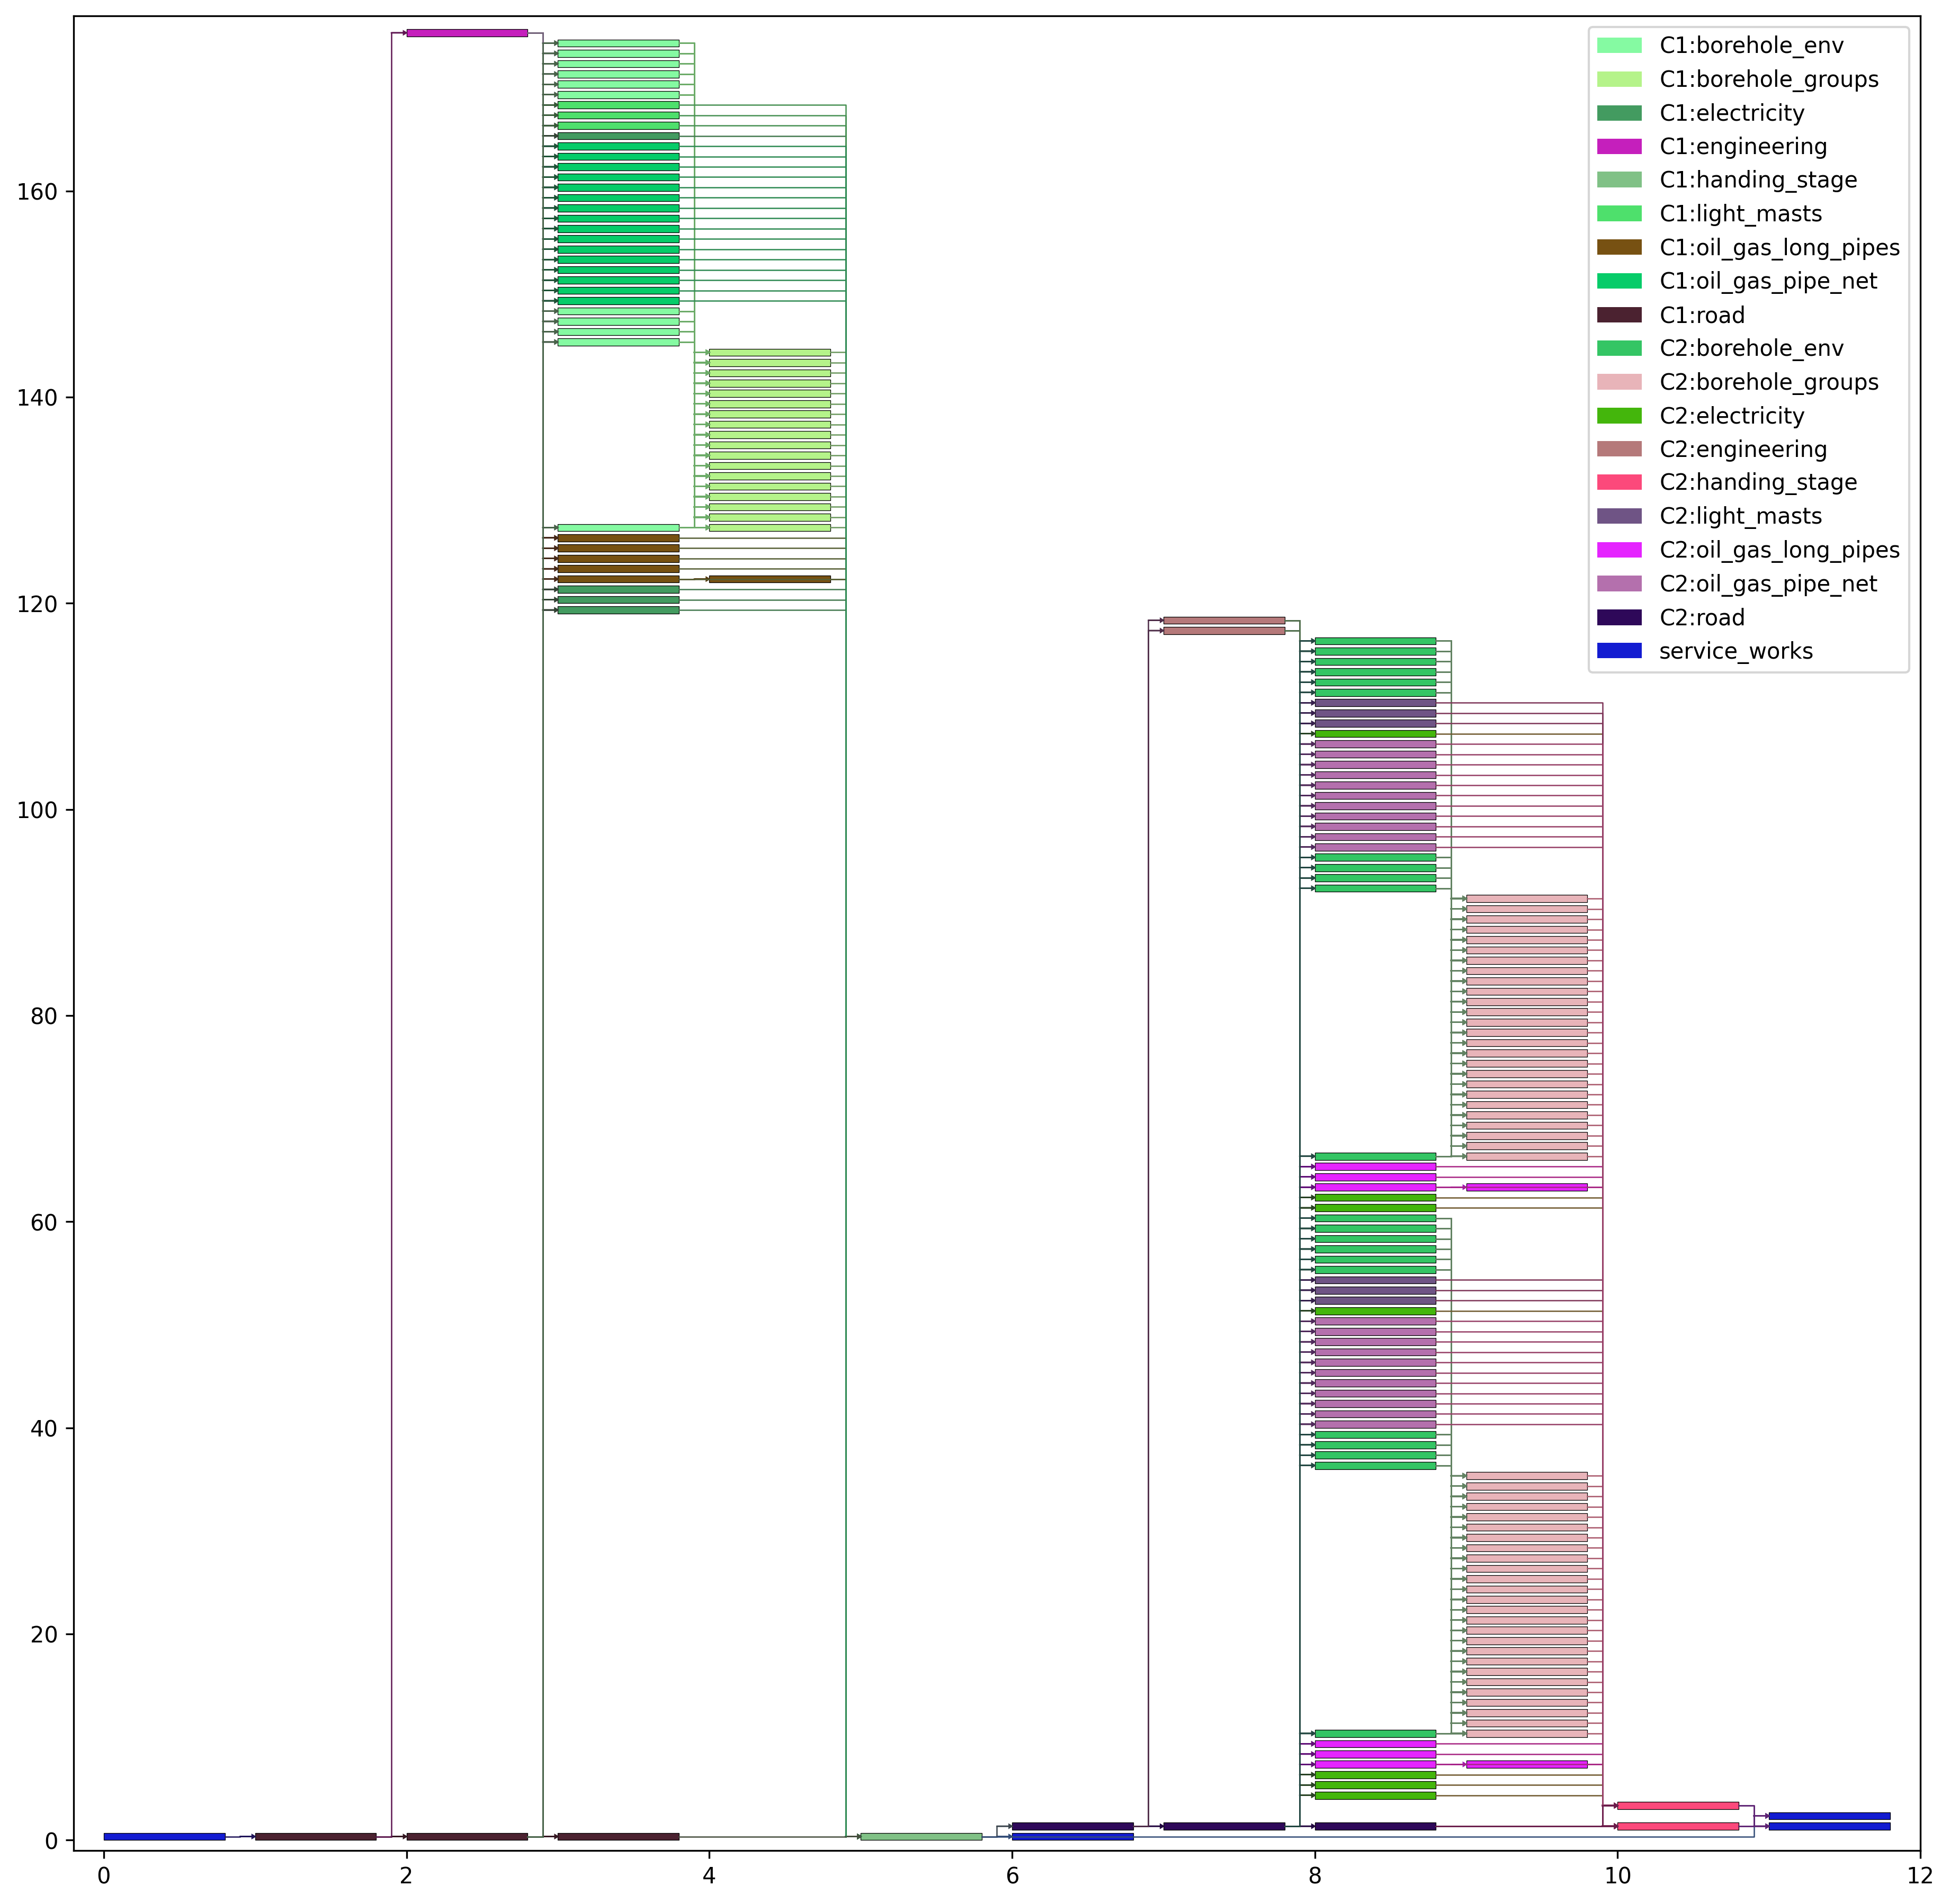

In [3]:
''' visualizing work graph, here we build a figure that shows nodes and edges in beautiful style
'''
from sampo.utilities.visualization.work_graph import work_graph_fig

fig = work_graph_fig(general_wg, (15, 15))
fig.show()

In [4]:
''' calculating the number of works in the generated WorkGraph here
'''
works_count = general_wg.vertex_count

''' calculating the number of connections between the works here
'''
connections = general_wg.adj_matrix.nnz

''' calculating the maximum number of successors for works in the generated WorkGraph
'''
succ = max(general_wg.adj_matrix[i, :].nnz for i in range(general_wg.vertex_count))

print(f' Number of works: {works_count}\n Number of connections: {connections}\n Maximum successors: {succ}')

 Number of works: 191
 Number of connections: 926
 Maximum successors: 64


Write your answers bellow:

1.  191
2.  926
3.  64

### **1.2 Contractors' creation**

Create lists of two contractors to execute the works from the generated WorkGraph object.

Use the function to get the contractor from the work graph and `MIN` and `AVG` generation modes.

In [5]:
''' creating contractors here
'''
from sampo.generator.environment.contractor_by_wg import get_contractor_by_wg, ContractorGenerationMethod

contractors = [ get_contractor_by_wg(    general_wg,
                                         method=ContractorGenerationMethod.MIN
                                    ),
                get_contractor_by_wg(     general_wg,
                                          method=ContractorGenerationMethod.AVG
                                    ),
              ]



### **Scheduler construction**

Before scheduling we should specify scheduling algorithm used for transforming input data to the final schedule. At this time SAMPO contains heuristic algorithms, such as HEFTAddEnd, HEFTAddBetween and Topological scheduler, and the Genetic algorithm. While creation, we can specify the hyperparameters to fit the algorithm.

Initializing three types of schedulers (Genetic, HEFT, and HEFTBetween) and configure the Genetic scheduler's attributes to solve the total schedule time minimization task most effectively.

**Note:** Schedule time minimization is the default optimization metric for all schedulers.


### **1.3 Initializing and configuring the schedulers**



In [6]:
''' tuning genetic scheduler's hyperparameter here
'''
GENERATIONS = 50
MUTATE_ORDER = 0.05
MUTATE_RESOURCES = 0.005
SIZE_OF_POPULATION = 50

In [7]:
''' initializing four schedulers
'''
from sampo.scheduler.heft.base import HEFTScheduler, HEFTBetweenScheduler
from sampo.scheduler.genetic.base import GeneticScheduler

''' creating simple heuristic schedulers
'''
HEFTAddEnd_scheduler = HEFTScheduler()
HEFTAddBetween_scheduler = HEFTBetweenScheduler()
genetic_raw_scheduler = GeneticScheduler()

''' creating more complex genetic scheduler
'''
genetic_fresh_scheduler = GeneticScheduler(
                                            number_of_generation=GENERATIONS,
                                            mutate_order=MUTATE_ORDER,
                                            mutate_resources=MUTATE_RESOURCES,
                                            size_of_population=SIZE_OF_POPULATION,
                                          )



Can not find native module; switching to default



### **Scheduling process**

SAMPO provides a simple interface to all its features. It called SchedulingPipeline. Using it you only should pass all the scheduling arguments, it remembers them, and you can produce schedules in many ways.


We need to create `SchedulingPipeline` object, pass the prepared data about graph structure, contractors, and schedulers to it, and build three schedules for three types of schedulers.

### **1.4 Configuring scheduling pipeline**

In [8]:
''' creating SchedulingPipeline objects and generating schedules for all schedulers' types
'''
from sampo.pipeline import SchedulingPipeline


HEFT_schedule = SchedulingPipeline\
    .create() \
    .wg(general_wg) \
    .contractors(contractors) \
    .schedule(HEFTAddEnd_scheduler) \
    .finish()

HEFTBetween_schedule = SchedulingPipeline\
    .create() \
    .wg(general_wg) \
    .contractors(contractors) \
    .schedule(HEFTAddBetween_scheduler) \
    .finish()

genetic_raw_schedule = SchedulingPipeline\
    .create() \
    .wg(general_wg) \
    .contractors(contractors) \
    .schedule(genetic_raw_scheduler) \
    .finish()

genetic_fresh_schedule = SchedulingPipeline\
    .create() \
    .wg(general_wg) \
    .contractors(contractors) \
    .schedule(genetic_fresh_scheduler) \
    .finish()


Genetic optimizing took 195.09243965148926 ms
Toolbox initialization & first population took 7906.731605529785 ms
First population evaluation took 4471.310377120972 ms
-- Generation 1, population=50, best fitness=1408.0 --
-- Generation 2, population=50, best fitness=1408.0 --
-- Generation 3, population=50, best fitness=1408.0 --
-- Generation 4, population=50, best fitness=1408.0 --
-- Generation 5, population=50, best fitness=1408.0 --
-- Generation 6, population=50, best fitness=1408.0 --
-- Generation 7, population=50, best fitness=1408.0 --
-- Generation 8, population=50, best fitness=1408.0 --
-- Generation 9, population=50, best fitness=1408.0 --
-- Generation 10, population=50, best fitness=1408.0 --
-- Generation 11, population=50, best fitness=1335.0 --
-- Generation 12, population=50, best fitness=1335.0 --
-- Generation 13, population=50, best fitness=1335.0 --
-- Generation 14, population=50, best fitness=1335.0 --
-- Generation 15, population=50, best fitness=1335.0 --
-

### **1.5 Visualization of the resulting schedule**

Visualize the Gantt charts for the best schedules for all three WorkGraphs.  

Use the `ShowFig` visualization mode and the value of the attribute `remove_service_tasks=False`

In [9]:
''' visualizing graph, diagram that shows scheduled works on time scale
    adding the stages merging process for the better visualization and setup the start date
    schedule was calculated in abstract 'time units', let's recalculate it with real dates also here we remove service nodes and edges
'''
from sampo.utilities.visualization.base import VisualizationMode
from sampo.utilities.visualization.schedule import schedule_gant_chart_fig


genetic_raw_merged_schedule = genetic_raw_schedule.merged_stages_datetime_df("2023-10-30")

genetic_raw_fig = schedule_gant_chart_fig( schedule_dataframe  =genetic_raw_merged_schedule,
                                           visualization = VisualizationMode.ShowFig,
                                           remove_service_tasks = False )


In [10]:
genetic_fresh_merged_schedule = genetic_fresh_schedule.merged_stages_datetime_df("2023-10-30")

genetic_fresh_fig = schedule_gant_chart_fig( schedule_dataframe = genetic_fresh_merged_schedule,
                                             visualization = VisualizationMode.ShowFig,
                                             remove_service_tasks = False )


In [11]:
HEFT_merged_schedule = HEFT_schedule.merged_stages_datetime_df("2023-10-30")

HEFT_fig = schedule_gant_chart_fig( schedule_dataframe = HEFT_merged_schedule,
                                    visualization = VisualizationMode.ShowFig,
                                    remove_service_tasks = False )



In [12]:
HEFTBetween_merged_schedule = HEFTBetween_schedule.merged_stages_datetime_df("2023-10-30")

HEFTBetween_fig = schedule_gant_chart_fig( schedule_dataframe = HEFTBetween_merged_schedule,
                                           visualization = VisualizationMode.ShowFig,
                                           remove_service_tasks = False )



### **2. Schedule time optimization on the graph of a real industrial project**

The file `gas_network_works_info.csv` contains information on the structure of works in the project for the installation of gas distribution networks in the field. Create a WorkGraph object based on it and build a complete planning pipeline to obtain a schedule that optimizes all works' completion time.

The choice of scheduler type and hyperparameter settings is left to your discretion.

In [13]:
!ls

drive  gas_network_works_info.csv  sample_data


In [14]:
''' creating WorkGraph, configuring scheduling pipeline and visualizing the results of scheduling bellow (free-form)

    Creating scheduling pipeline with the automatic WorkGraph object generation from the given file.
    If you haven't got the historical data,
    change_base_on_history parameter schould be set to False and
    is_wg_has_full_info_about_connections parameter schould be set to True
'''

''' tuning genetic scheduler's hyperparameter here
'''


def plain_scheduling(setup_scheduler_parameters):
    schedule = SchedulingPipeline.create() \
        .wg( wg="gas_network_works_info.csv",
             is_wg_has_full_info_about_connections=True,
             change_base_on_history=False) \
        .schedule(setup_scheduler_parameters) \
        .finish()

    merged_schedule = schedule.merged_stages_datetime_df("2023-10-30")

    fig_schedule = schedule_gant_chart_fig( schedule_dataframe=merged_schedule,
                                            visualization=VisualizationMode.ShowFig,
                                            remove_service_tasks = False
                                          )
    print(f'Scheduled: {len(schedule.to_schedule_work_dict)} works')
    print(f'Execution time: {schedule.execution_time}')




In [20]:
''' visualizing graph, diagram that shows scheduled works on time scale
    adding the stages merging process for the better visualization and setup the start date
    schedule was calculated in abstract 'time units', let's recalculate it with real dates also here we remove service nodes and edges
'''
plain_scheduling(HEFTScheduler())

Scheduled: 32 works
Execution time: 19


In [21]:
''' visualizing graph, diagram that shows scheduled works on time scale
    adding the stages merging process for the better visualization and setup the start date
    schedule was calculated in abstract 'time units', let's recalculate it with real dates also here we remove service nodes and edges
'''
plain_scheduling(HEFTBetweenScheduler())

Scheduled: 32 works
Execution time: 1


In [22]:
''' visualizing graph, diagram that shows scheduled works on time scale
    adding the stages merging process for the better visualization and setup the start date
    schedule was calculated in abstract 'time units', let's recalculate it with real dates also here we remove service nodes and edges
'''

''' creating more complex genetic scheduler
'''

GENERATIONS = 40
MUTATE_ORDER = 0.1
MUTATE_RESOURCES = 0.05
SIZE_OF_POPULATION = 60

genetic_fresh_scheduler = GeneticScheduler(
                                            number_of_generation=GENERATIONS,
                                            mutate_order=MUTATE_ORDER,
                                            mutate_resources=MUTATE_RESOURCES,
                                            size_of_population=SIZE_OF_POPULATION,
                                          )

plain_scheduling(genetic_fresh_scheduler)

Genetic optimizing took 21.038293838500977 ms
Toolbox initialization & first population took 1487.9484176635742 ms
First population evaluation took 1354.968786239624 ms
-- Generation 1, population=60, best fitness=6.0 --
-- Generation 2, population=60, best fitness=6.0 --
-- Generation 3, population=60, best fitness=6.0 --
-- Generation 4, population=60, best fitness=6.0 --
-- Generation 5, population=60, best fitness=6.0 --
-- Generation 6, population=60, best fitness=6.0 --
-- Generation 7, population=60, best fitness=6.0 --
-- Generation 8, population=60, best fitness=6.0 --
-- Generation 9, population=60, best fitness=6.0 --
-- Generation 10, population=60, best fitness=5.0 --
-- Generation 11, population=60, best fitness=5.0 --
-- Generation 12, population=60, best fitness=5.0 --
-- Generation 13, population=60, best fitness=5.0 --
-- Generation 14, population=60, best fitness=5.0 --
-- Generation 15, population=60, best fitness=5.0 --
-- Generation 16, population=60, best fitness

Scheduled: 32 works
Execution time: 5



### **3. Local optimization**

There are two types of local optimization in SAMPO:

1.   Order
2.   Schedule



### **3.1 Order optimization with HEFTScheduler()**

In [24]:
''' order optimization with HEFTScheduler()
    this local optimization type should rearrange scheduling order to improve scheduling results

'''
from sampo.scheduler.utils.local_optimization import SwapOrderLocalOptimizer

local_optimizer = SwapOrderLocalOptimizer()

schedule = SchedulingPipeline.create() \
        .wg( wg="gas_network_works_info.csv",
             is_wg_has_full_info_about_connections=True,
             change_base_on_history=False) \
        .optimize_local(local_optimizer, range(0, 10)) \
        .schedule(HEFTScheduler()) \
        .finish()

merged_schedule = schedule.merged_stages_datetime_df("2023-10-30")

fig_schedule = schedule_gant_chart_fig( schedule_dataframe=merged_schedule,
                                        visualization=VisualizationMode.ShowFig,
                                        remove_service_tasks = False
                                      )

print(f'Scheduled: {len(schedule.to_schedule_work_dict)} works')
print(f'Execution time: {schedule.execution_time}')


Swapped 0 times!


Scheduled: 32 works
Execution time: 20


### **3.2 Schedule optimization with HEFTScheduler()**

In [28]:
''' schedule optimization with with HEFTScheduler()
    this local optimization should recalculate parts of schedule to make it better

'''
from sampo.scheduler.timeline.just_in_time_timeline import JustInTimeTimeline
from sampo.scheduler.utils.local_optimization import ParallelizeScheduleLocalOptimizer

schedule_optimizer = ParallelizeScheduleLocalOptimizer(JustInTimeTimeline)

schedule = SchedulingPipeline.create() \
        .wg( wg="gas_network_works_info.csv",
             is_wg_has_full_info_about_connections=True,
             change_base_on_history=False) \
        .schedule(HEFTScheduler()) \
        .optimize_local(schedule_optimizer, range(0, 5)) \
        .finish()

merged_schedule = schedule.merged_stages_datetime_df("2023-10-30")

fig_schedule = schedule_gant_chart_fig( schedule_dataframe=merged_schedule,
                                        visualization=VisualizationMode.ShowFig,
                                        remove_service_tasks = False
                                      )

print(f'Scheduled: {len(schedule.to_schedule_work_dict)} works')
print(f'Execution time: {schedule.execution_time}')


Scheduled: 32 works
Execution time: 21
